In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
!pip install plotly

import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

!pip install geopandas
!pip install python-Levenshtein
!pip install fuzzywuzzy
!pip install descartes
!pip install geoplot

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/USAccidentsMarch23.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head(5) #first 5 rows of Data Frame

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     7728394 non-null  object 
 1   Source                 7728394 non-null  object 
 2   Severity               7728394 non-null  int64  
 3   Start_Time             7728394 non-null  object 
 4   End_Time               7728394 non-null  object 
 5   Start_Lat              7728394 non-null  float64
 6   Start_Lng              7728394 non-null  float64
 7   End_Lat                4325632 non-null  float64
 8   End_Lng                4325632 non-null  float64
 9   Distance(mi)           7728394 non-null  float64
 10  Description            7728389 non-null  object 
 11  Street                 7717525 non-null  object 
 12  City                   7728141 non-null  object 
 13  County                 7728394 non-null  object 
 14  State             

In [7]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


Feature Engineering

In [9]:
df.loc[:,'Start_Time1'] = pd.to_datetime(df['Start_Time'])
df.loc[:,'End_Time1'] = pd.to_datetime(df['End_Time'])

In [10]:
# creating New Attributes: Day, Month, Hour, Minute, Day of Week, Year, Accident Duration
df.loc[:,'Day'] = df['Start_Time1'].dt.day
df.loc[:,'Month'] = df['Start_Time1'].dt.month
df.loc[:,'Hour'] = df['Start_Time1'].dt.hour
df.loc[:,'Minute'] = df['Start_Time1'].dt.minute
df.loc[:,'Day of Week'] = df['Start_Time1'].dt.dayofweek + 1
df.loc[:,'Year'] = df['Start_Time1'].dt.year
df.loc[:,'Accident_duration'] = (df['End_Time1'] - df['Start_Time1']).dt.total_seconds() / 60

In [11]:
df['Comfort_Index'] = (df['Temperature(F)'] - 32) * (df['Humidity(%)'] / 100)

In [12]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [13]:
from sklearn.preprocessing import StandardScaler
X = df[['Start_Lat', 'Start_Lng']]
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

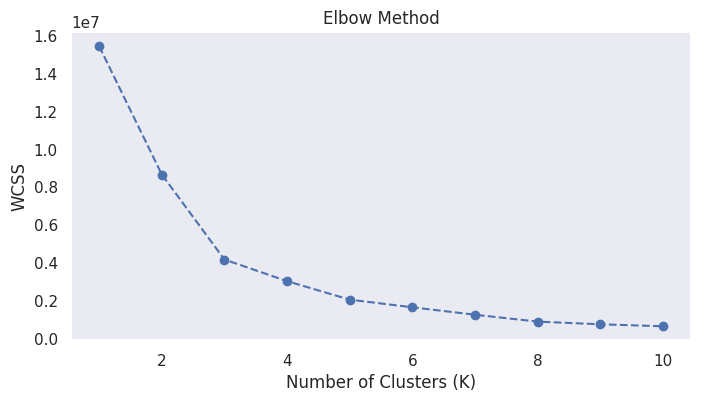

In [14]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df['cluster_LatLng'] = clusters

In [16]:
df['cluster_LatLng'].unique()


array([0, 4, 3, 2, 1], dtype=int32)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X = label_encoder.fit_transform(df['Zipcode']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

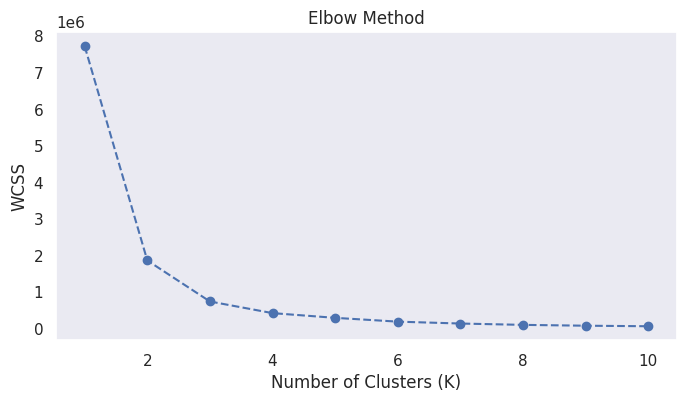

In [18]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

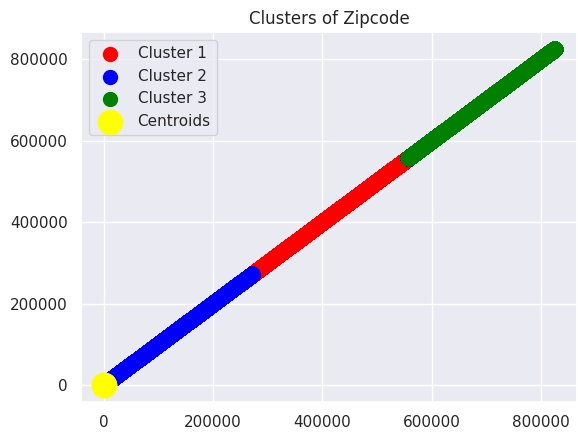

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Zipcode')
# plt.xlabel('Severity')
# plt.ylabel('ZipCode')
plt.legend()
plt.show()

In [21]:
df['cluster_Zipcode'] = y_kmeans
df['cluster_Zipcode'].unique()

array([0, 1, 2], dtype=int32)

In [22]:
X =label_encoder.fit_transform(df['Airport_Code']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

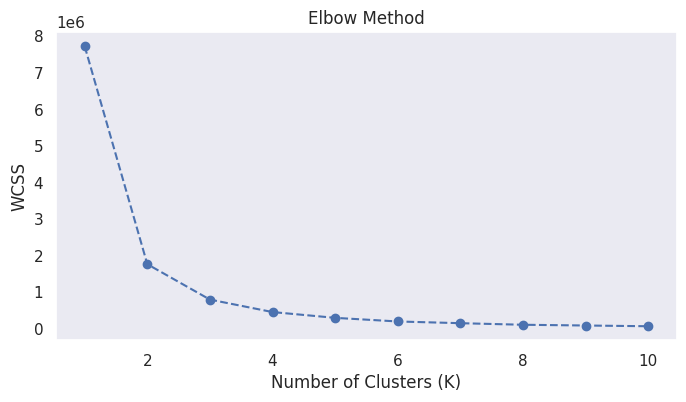

In [23]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

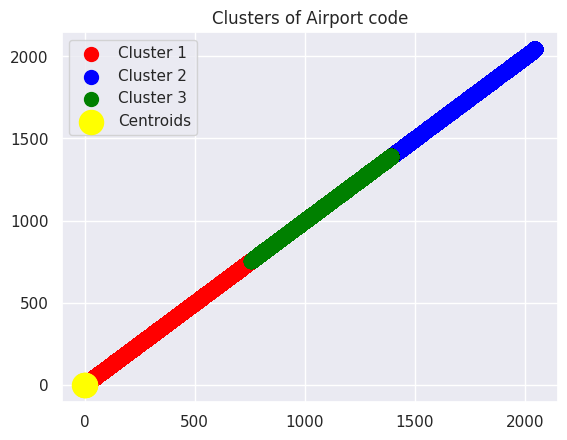

In [25]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Airport code')
# plt.xlabel('Severity')
# plt.ylabel('State')
plt.legend()
plt.show()

In [26]:
df['cluster_Airport_Code'] = y_kmeans
df['cluster_Airport_Code'].unique()

array([0, 2, 1], dtype=int32)

In [27]:
X = label_encoder.fit_transform(df['Street']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

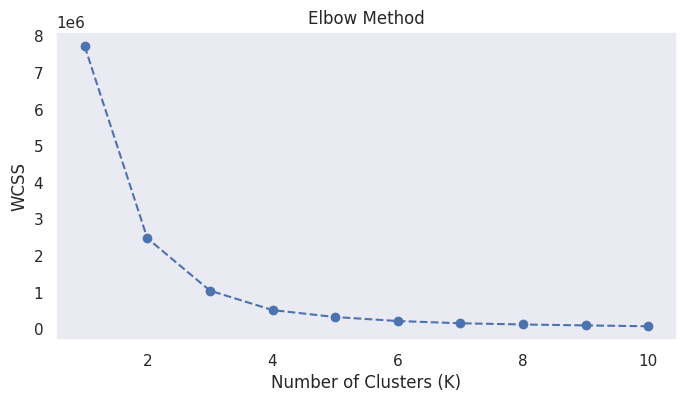

In [28]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

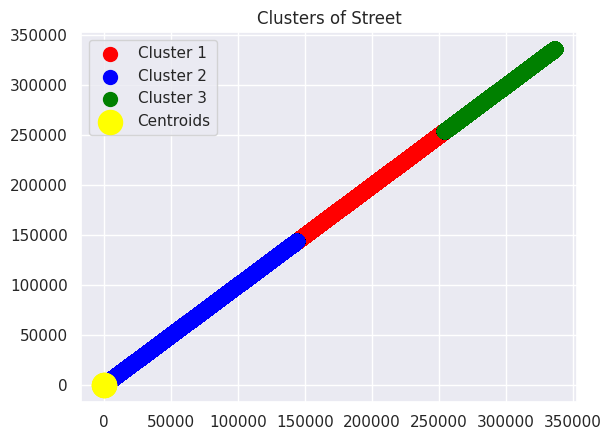

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Street')
# plt.xlabel('Severity')
# plt.ylabel('Street')
plt.legend()
plt.show()

In [31]:
df['cluster_Street'] = y_kmeans
df['cluster_Street'].unique()

array([0, 2, 1], dtype=int32)

In [32]:
X = label_encoder.fit_transform(df['City']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

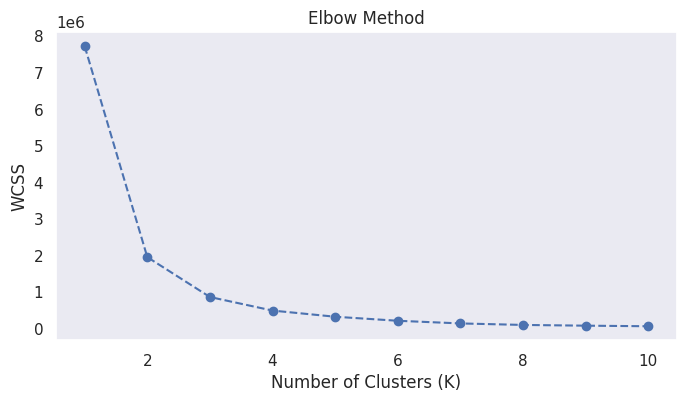

In [33]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

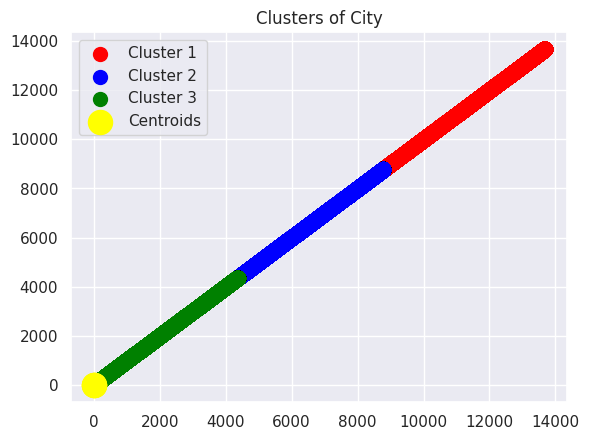

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of City')
# plt.xlabel('Severity')
# plt.ylabel('Street')
plt.legend()
plt.show()

In [36]:
df['cluster_City'] = y_kmeans
df['cluster_City'].unique()

array([2, 0, 1], dtype=int32)

In [37]:
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other'

df['Weather_Bin'] = df['Weather_Condition'].apply(map_weather_to_bins)


Outlier Treatment

In [38]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Day,Month,Hour,Minute,Day of Week,Year,Accident_duration,Comfort_Index,cluster_LatLng,cluster_Zipcode,cluster_Airport_Code,cluster_Street,cluster_City
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.554250e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,1.574993e+01,6.706355e+00,1.232857e+01,2.979513e+01,3.594364e+00,2.019908e+03,4.444210e+02,1.780125e+01,1.792104e+00,1.073641e+00,9.604342e-01,6.745335e-01,9.670045e-01
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,8.684967e+00,3.641262e+00,5.464796e+00,1.725485e+01,1.806053e+00,1.914670e+00,1.351229e+04,1.275373e+01,1.545552e+00,8.542174e-01,7.938812e-01,8.258160e-01,8.208459e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,1.216667e+00,-1.098000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,8.000000e+00,3.000000e+00,8.000000e+00,1.500000e+01,2.000000e+00,2.018000e+03,3.150000e+01,8.760000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,1.600000e+01,7.000000e+00,1.300000e+01,3.000000e+01,4.000000e+00,2.020000e+03,7.483333e+01,1.800000e+01,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.300000e+01,1.000000e+01,1.700000e+01,4.500000e+01,5.000000e+00,2.022000e+03,1.251500e+02,2.736000e+01,4.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,3.100000e+01,1.200000e+01,2.300000e+01,5.900000e+01,7.000000e+00,2.023000e+03,2.812939e+06,1.244160e+02,4.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [39]:
df['Severity'] = df['Severity'].astype(str)


# Select numerical columns excluding 'Severity' and 'Distance(mi)'
numerical_columns = df.select_dtypes(include=['number']).drop(columns=['Distance(mi)']).columns

# Check the number of features
num_features = len(numerical_columns)
print("Number of numerical features (excluding 'Severity' and 'Distance(mi)'):", num_features)



Number of numerical features (excluding 'Severity' and 'Distance(mi)'): 24


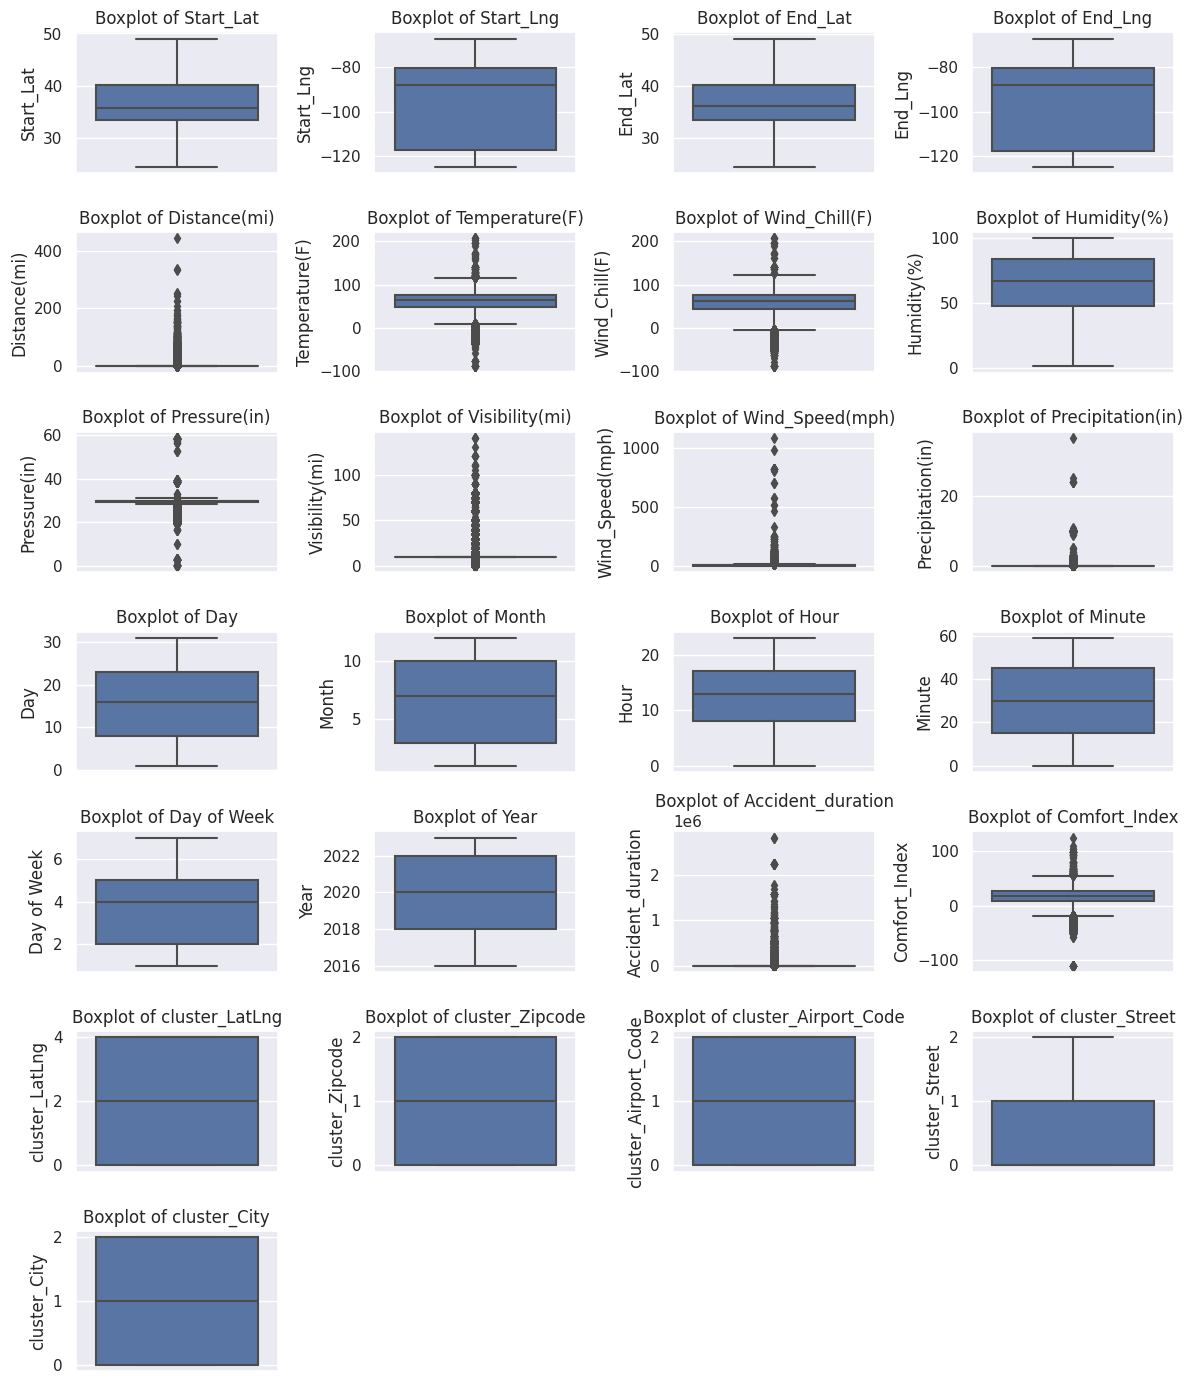

In [40]:
feature_list = df.select_dtypes(include=['number']).columns

num_features = len(feature_list)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(12, num_rows * 2))

# Create a subplot for each feature
for i in range(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature_list[i]], data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

plt.show()

In [41]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

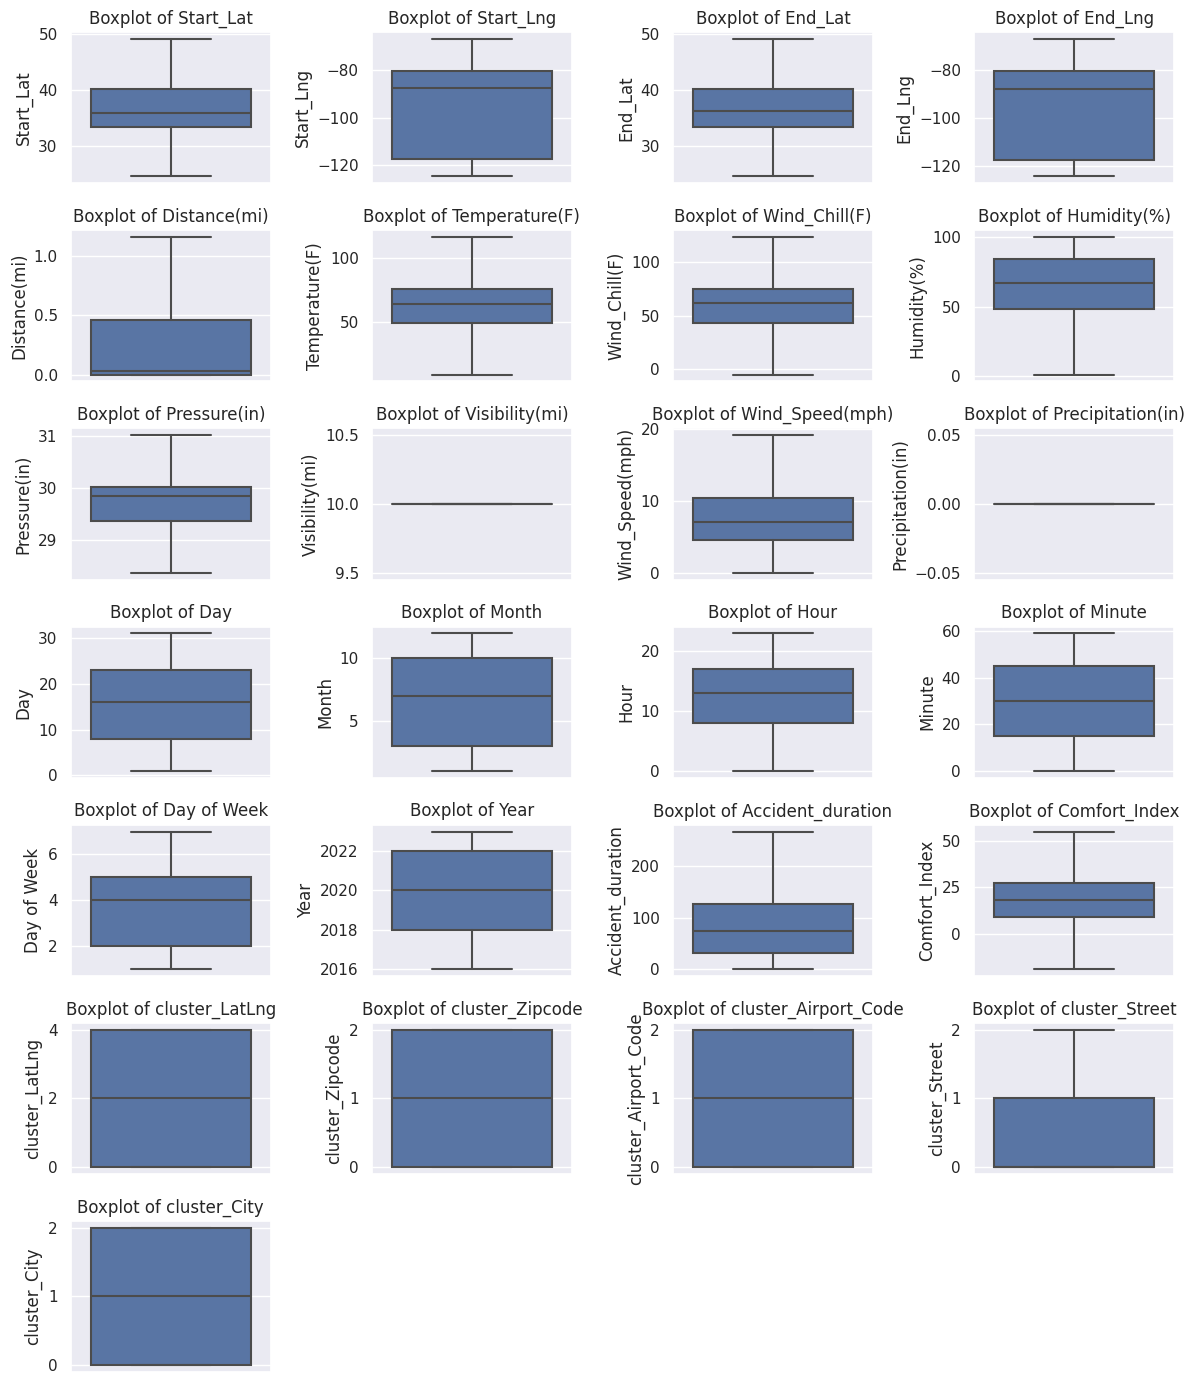

In [43]:
feature_list = df.select_dtypes(include=['number']).columns

num_features = len(feature_list)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(12, num_rows * 2))

# Create a subplot for each feature
for i in range(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[feature_list[i]], data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

plt.show()

In [44]:
pd.set_option('display.max_columns', None)
df.head(5) #first 5 rows of Data Frame

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time1,End_Time1,Day,Month,Hour,Minute,Day of Week,Year,Accident_duration,Comfort_Index,cluster_LatLng,cluster_Zipcode,cluster_Airport_Code,cluster_Street,cluster_City,Weather_Bin
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00,2016-02-08 11:00:00,8.0,2.0,5.0,46.0,1.0,2016.0,265.625,4.459,0.0,0.0,0.0,0.0,2.0,Rainy
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59,2016-02-08 06:37:59,8.0,2.0,6.0,7.0,1.0,2016.0,30.000,5.900,0.0,0.0,0.0,0.0,0.0,Rainy
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27,2016-02-08 07:19:27,8.0,2.0,6.0,49.0,1.0,2016.0,30.000,4.000,0.0,0.0,2.0,2.0,0.0,Other
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,10.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34,2016-02-08 07:53:34,8.0,2.0,7.0,23.0,1.0,2016.0,30.000,2.976,0.0,0.0,0.0,0.0,2.0,Cloudy
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,10.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07,2016-02-08 08:09:07,8.0,2.0,7.0,39.0,1.0,2016.0,30.000,3.560,0.0,0.0,2.0,0.0,2.0,Cloudy


In [45]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ID :  7728394
A-1          1
A-8          1
A-9          1
A-10         1
A-11         1
            ..
A-7777734    1
A-7777733    1
A-7777732    1
A-7777752    1
A-7777761    1
Name: ID, Length: 7728394, dtype: int64


SOURCE :  3
Source3      97389
Source2    3305373
Source1    4325632
Name: Source, dtype: int64


SEVERITY :  4
1      67366
4     204710
3    1299337
2    6156981
Name: Severity, dtype: int64


START_TIME :  6131796
2021-09-24 23:39:34.000000000      1
2016-12-16 11:14:43                1
2016-12-16 11:17:51                1
2016-12-16 11:13:04                1
2016-12-16 11:13:47                1
                                ... 
2020-12-16 13:53:25               96
2021-11-21 18:37:51              108
2021-02-16 06:42:43              139
2021-01-26 16:17:33              156
2021-01-26 16:16:13              225
Name: Start_Time, Length: 6131796, dtype: int64


END_TIME :  6705355
2021-08-07 13:43:15      1
2016-11-28 22:09:22      1
2016-11-28 22:05:18      1
2016

In [46]:
for column in df.columns:
    if df[column].dtype == 'bool':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

AMENITY :  2
True       96334
False    7632060
Name: Amenity, dtype: int64


BUMP :  2
True        3514
False    7724880
Name: Bump, dtype: int64


CROSSING :  2
True      873763
False    6854631
Name: Crossing, dtype: int64


GIVE_WAY :  2
True       36582
False    7691812
Name: Give_Way, dtype: int64


JUNCTION :  2
True      571342
False    7157052
Name: Junction, dtype: int64


NO_EXIT :  2
True       19545
False    7708849
Name: No_Exit, dtype: int64


RAILWAY :  2
True       66979
False    7661415
Name: Railway, dtype: int64


ROUNDABOUT :  2
True         249
False    7728145
Name: Roundabout, dtype: int64


STATION :  2
True      201901
False    7526493
Name: Station, dtype: int64


STOP :  2
True      214371
False    7514023
Name: Stop, dtype: int64


TRAFFIC_CALMING :  2
True        7598
False    7720796
Name: Traffic_Calming, dtype: int64


TRAFFIC_SIGNAL :  2
True     1143772
False    6584622
Name: Traffic_Signal, dtype: int64


TURNING_LOOP :  1
False    7728394
Name: Turni

Data Analysis

In [47]:
import plotly.express as px

top_10_cities = pd.DataFrame(df['Year'].value_counts()).reset_index().rename(columns={'index': 'Year', 'Year': 'Cases'})

severity_df = df.groupby(['Year', 'Severity']).size().unstack(fill_value=0).reset_index()

severity_levels = severity_df.columns[1:]

severity_df_top_10 = severity_df[severity_df['Year'].isin(top_10_cities['Year'])]

# Set the order of cities
city_order = list(top_10_cities['Year'])

# Define a different color gradient
color_gradient = px.colors.sequential.Plasma

# Create a stacked bar chart with the specified color gradient
fig = px.bar(severity_df_top_10, x='Year', y=severity_levels,
             labels={'value': 'Accident Cases'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023) by Severity',
             color_discrete_map={severity: color_gradient[i] for i, severity in enumerate(severity_levels)},
             text=severity_df_top_10[severity_levels].sum(axis=1).astype(int),
             category_orders={'Year': city_order})

fig.update_layout(title={'text': 'The most number of Road Accident Cases (2016-2023) by Severity',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                  plot_bgcolor='white',paper_bgcolor='white')  # Set white background

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_xaxes(title_text='Years', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases')

fig.show()


In [48]:
import plotly.express as px

city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index': 'City', 'City': 'Cases'})
top_10_cities = pd.DataFrame(city_df.head(10))

severity_df = df.groupby(['City', 'Severity']).size().unstack(fill_value=0).reset_index()

severity_levels = severity_df.columns[1:]

# Filter for the top 10 cities
severity_df_top_10 = severity_df[severity_df['City'].isin(top_10_cities['City'])]

# Set the order of cities
city_order = list(top_10_cities['City'])

# Define a different color gradient
color_gradient = px.colors.sequential.Plasma

# Create a stacked bar chart with the specified color gradient
fig = px.bar(severity_df_top_10, x='City', y=severity_levels,
             labels={'value': 'Accident Cases'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023) by Severity',
             color_discrete_map={severity: color_gradient[i] for i, severity in enumerate(severity_levels)},
             text=severity_df_top_10[severity_levels].sum(axis=1).astype(int),
             category_orders={'City': city_order})

fig.update_layout(title={'text': 'Top 10 Cities in US with the most number of Road Accident Cases (2016-2023) by Severity',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                  plot_bgcolor='white',paper_bgcolor='white')  # Set white background

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_xaxes(title_text='Cities', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases')

fig.show()


In [49]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index': 'City', 'City': 'Cases'})
top_10_cities = pd.DataFrame(city_df.head(10))

# Calculate percentages
total_cases = top_10_cities['Cases'].sum()
top_10_cities['Percentage'] = (top_10_cities['Cases'] / total_cases) * 100

fig = px.bar(top_10_cities, x='City', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=top_10_cities['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Top 10 Cities in US with the most number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                  plot_bgcolor='white',paper_bgcolor='white')  # Set white background

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='Cities', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, top_10_cities['Cases'].max() + 50000])  # Increase limit by 50,000

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)  # Remove grid lines

fig.show()

In [50]:
import plotly.express as px

city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index': 'City', 'City': 'Cases'})
bottom_10_cities = pd.DataFrame(city_df.tail(10))

# Calculate percentages
total_cases = bottom_10_cities['Cases'].sum()
bottom_10_cities['Percentage'] = (bottom_10_cities['Cases'] / total_cases) * 100

fig = px.bar(bottom_10_cities, x='City', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Bottom 10 Cities in US with the least number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=bottom_10_cities['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Bottom 10 Cities in US with the least number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'grey'}},
                  plot_bgcolor='white',
                   paper_bgcolor='white')  # Set white background

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='Cities', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, bottom_10_cities['Cases'].max() + 50000])  # Increase limit by 50,000
fig.update_yaxes(title_text='Accident Cases', range=[0, 5])  # Increase limit to 2 million

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)  # Remove grid lines

fig.show()


In [51]:

us_states = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',
             'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
             'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
             'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts',
             'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands',
             'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
             'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio',
             'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island',
             'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia',
             'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}

state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index': 'State', 'State': 'Cases'})

# Function to convert the State Code with the actual corresponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

# Select the top 10 states
top_10_states = state_df.head(10)

# Calculate percentages
total_cases_states = top_10_states['Cases'].sum()
top_10_states['Percentage'] = (top_10_states['Cases'] / total_cases_states) * 100

fig = px.bar(top_10_states, x='State', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Top 10 States in US with the most number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=top_10_states['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Top 10 States in US with the most number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'grey'}},
                  plot_bgcolor='white',
                  paper_bgcolor='white')

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='States', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, 2000000])

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)

fig.show()



In [52]:
import pandas as pd
import plotly.express as px

us_states = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',
             'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
             'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
             'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts',
             'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands',
             'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
             'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio',
             'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island',
             'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia',
             'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}

state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index': 'State', 'State': 'Cases'})

def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

# Select the bottom 10 states
bottom_10_states = state_df.tail(10)

# Calculate percentages
total_cases_states_bottom = bottom_10_states['Cases'].sum()
bottom_10_states['Percentage'] = (bottom_10_states['Cases'] / total_cases_states_bottom) * 100

fig = px.bar(bottom_10_states, x='State', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Bottom 10 States in US with the least number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=bottom_10_states['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Bottom 10 States in US with the least number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'grey'}},
                 plot_bgcolor='white', paper_bgcolor='white')

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='States', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, bottom_10_states['Cases'].max() + 50000])
fig.update_yaxes(title_text='Accident Cases', range=[0, 20000])

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)
fig.show()

In [53]:
import plotly.express as px

top_10_cities = pd.DataFrame(df['Weather_Bin'].value_counts()).reset_index().rename(columns={'index': 'Weather_Bin', 'Weather_Bin': 'Cases'})

total_cases = top_10_cities['Cases'].sum()
top_10_cities['Percentage'] = (top_10_cities['Cases'] / total_cases) * 100

fig = px.bar(top_10_cities, x='Weather_Bin', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=top_10_cities['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Weather with the most number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                plot_bgcolor='white',  paper_bgcolor='white')

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='Weather', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, top_10_cities['Cases'].max() + 500000])

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)

fig.show()

In [54]:
import plotly.express as px

top_10_cities = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index': 'Street', 'Street': 'Cases'})
top_10_cities = pd.DataFrame(top_10_cities.head(10))

total_cases = top_10_cities['Cases'].sum()
top_10_cities['Percentage'] = (top_10_cities['Cases'] / total_cases) * 100

fig = px.bar(top_10_cities, x='Street', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=top_10_cities['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Timezones with the most number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                 plot_bgcolor='white', paper_bgcolor='white')

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='Timezones', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, top_10_cities['Cases'].max()+5000])

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)

fig.show()

In [55]:
import plotly.express as px

top_10_cities = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index': 'Street', 'Street': 'Cases'})
top_10_cities = pd.DataFrame(top_10_cities.tail(10))

# Calculate percentages
total_cases = top_10_cities['Cases'].sum()
top_10_cities['Percentage'] = (top_10_cities['Cases'] / total_cases) * 100

fig = px.bar(top_10_cities, x='Street', y='Cases', color='Cases',
             labels={'Cases': 'Accident Cases', 'Percentage': 'Percentage'},
             title='Top 10 Cities in US with the most number of Road Accident Cases (2016-2023)',
             color_continuous_scale='blues',
             text=top_10_cities['Percentage'].round(2).astype(str) + '%')

fig.update_layout(title={'text': 'Timezones with the most number of Road Accident Cases (2016-2023)',
                         'x': 0.5,
                         'xanchor': 'center',
                         'font': {'size': 20, 'color': 'black'}},
                plot_bgcolor='white',  paper_bgcolor='white')

fig.update_traces(textposition='outside')

fig.update_xaxes(title_text='Street', tickangle=10, tickfont=dict(size=12))
fig.update_yaxes(title_text='Accident Cases', range=[0, top_10_cities['Cases'].max()+4])

fig.update_layout(yaxis_showgrid=False, xaxis_showgrid=False)

fig.show()


In [56]:
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df['Accident_duration'].max(),round(df['Accident_duration'].max()/60), round(df['Accident_duration'].max()/60/24), df['Accident_duration'].min()))

Max time to clear an accident: 265.625 minutes or 4 hours or 0 days; Min to clear an accident td: 1.2166666666666666 minutes.


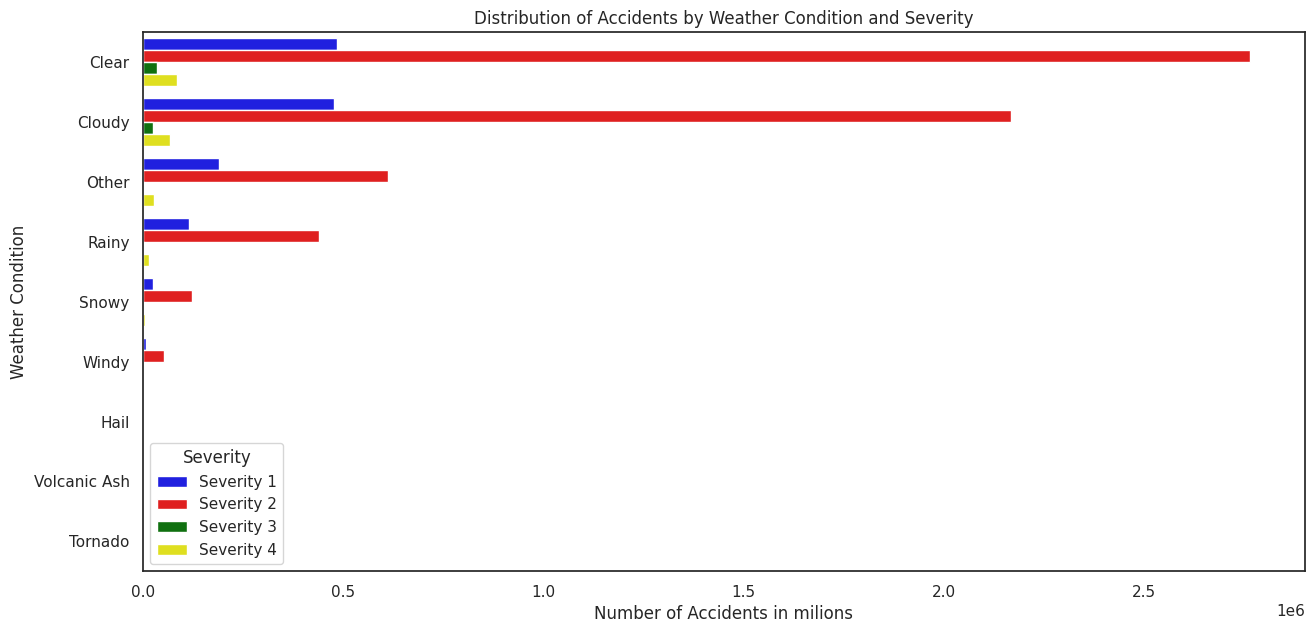

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for severity levels
severity_colors = {'1': 'green', '2': 'red', '3': 'blue', '4': 'yellow'}

plt.figure(figsize=(15, 7))
sns.set(style="white")
sns.countplot(y='Weather_Bin', data=df, hue='Severity', palette=severity_colors,
              order=df['Weather_Bin'].value_counts().index)

# Set labels and title
plt.title('Distribution of Accidents by Weather Condition and Severity')
plt.xlabel('Number of Accidents in milions')
plt.ylabel('Weather Condition')

# Customize the legend
legend_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
plt.legend(title='Severity', labels=legend_labels)

plt.show()


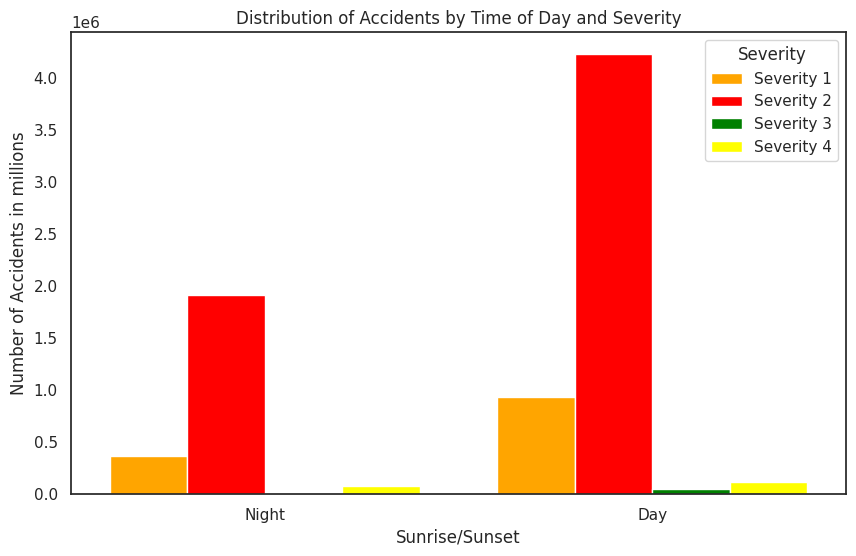

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_colors = {'1': 'green', '2': 'red', '3': 'orange', '4': 'yellow'}

plt.figure(figsize=(10, 6))
sns.set(style="white")
sns.countplot(x='Sunrise_Sunset', data=df, hue='Severity', palette=severity_colors, saturation=1)

# Set labels and title
plt.title('Distribution of Accidents by Time of Day and Severity')
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Number of Accidents in millions')

legend_labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
plt.legend(title='Severity', labels=legend_labels)

plt.show()



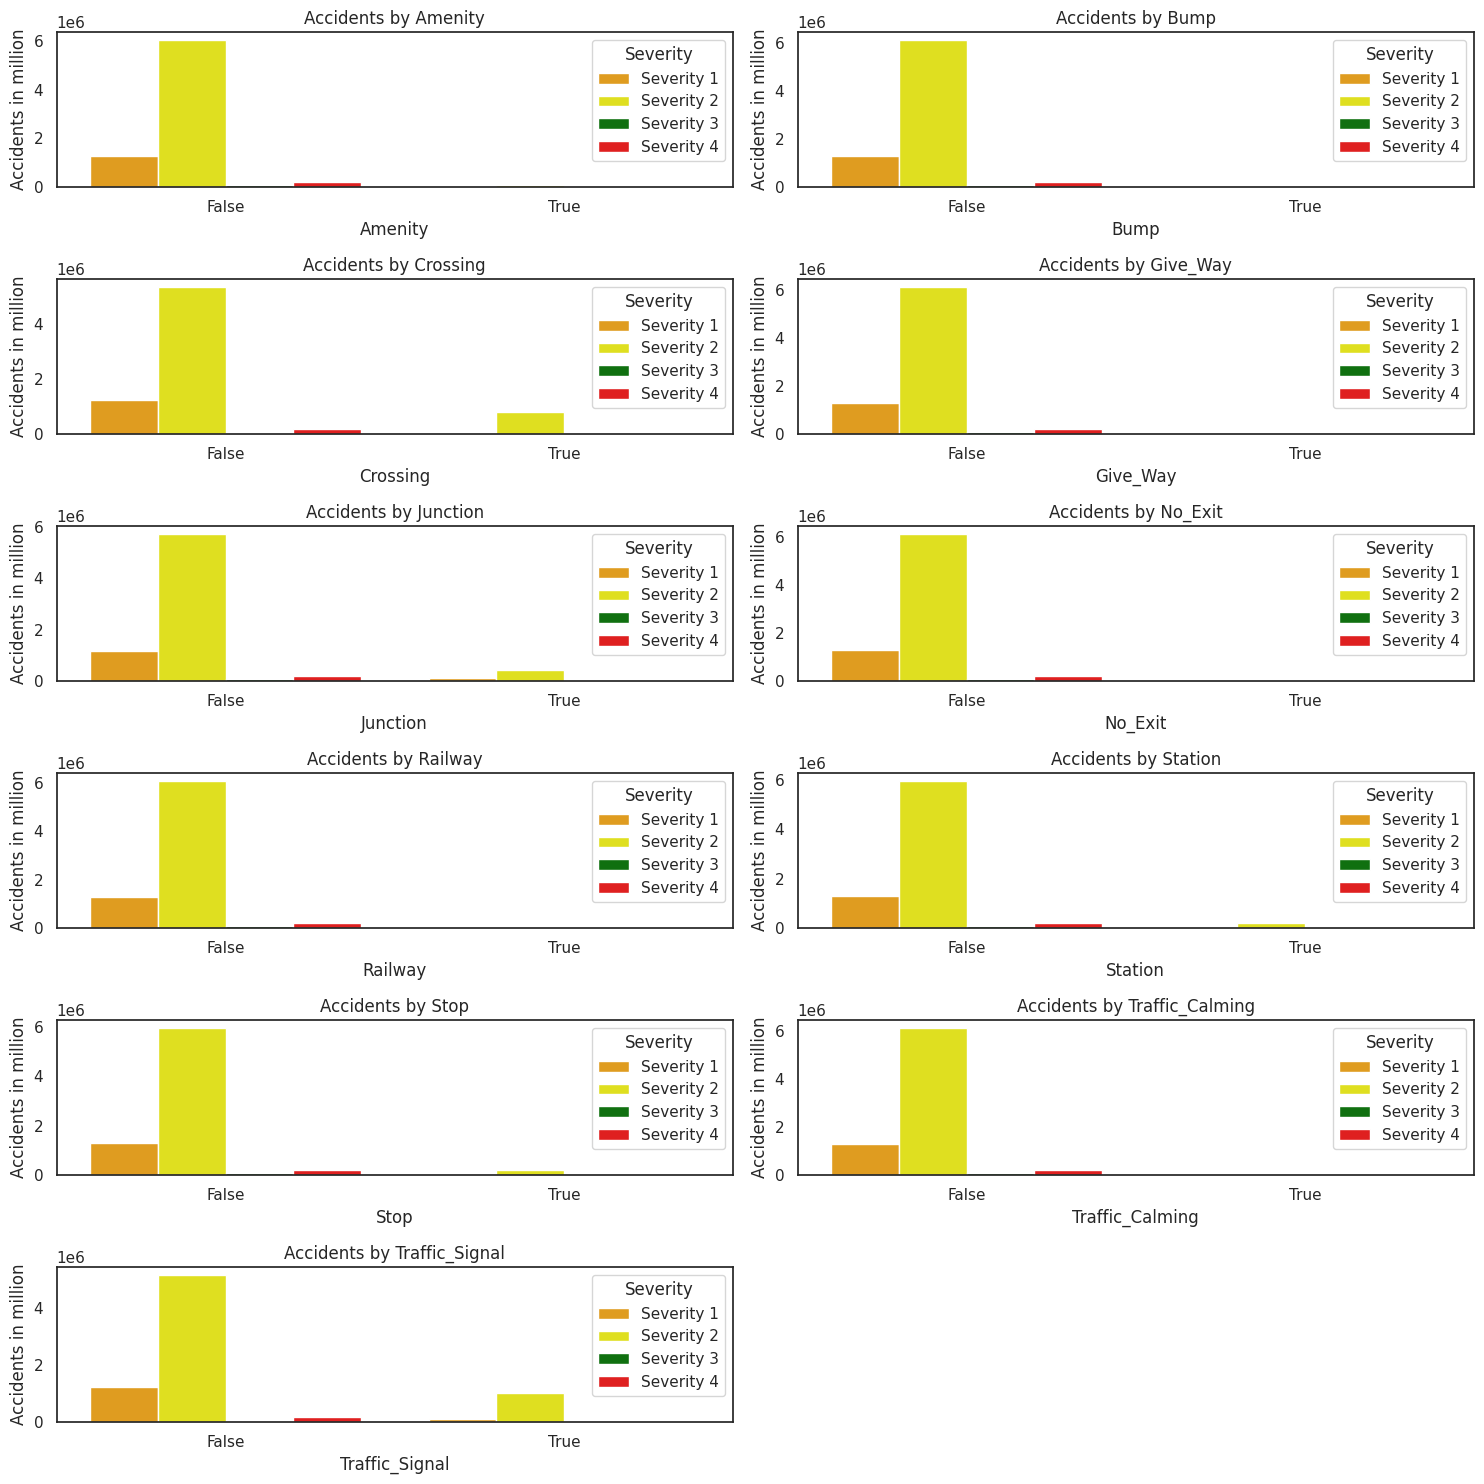

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_colors = {'1': 'green', '2': 'yellow', '3': 'orange', '4': 'red'}

road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

# Create subplots for each road feature in a 2x6 layout
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))
sns.set(style="white")  # Customize the style and remove grid lines

for i, feature in enumerate(road_features):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    ax = axes[row, col]
    sns.countplot(x=feature, data=df, hue='Severity', palette=severity_colors, ax=ax)
    ax.set_title(f'Accidents by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Accidents in million')
    ax.legend(title='Severity', labels=['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'])

# Remove any empty subplots
for i in range(len(road_features), 12):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()
plt.show()



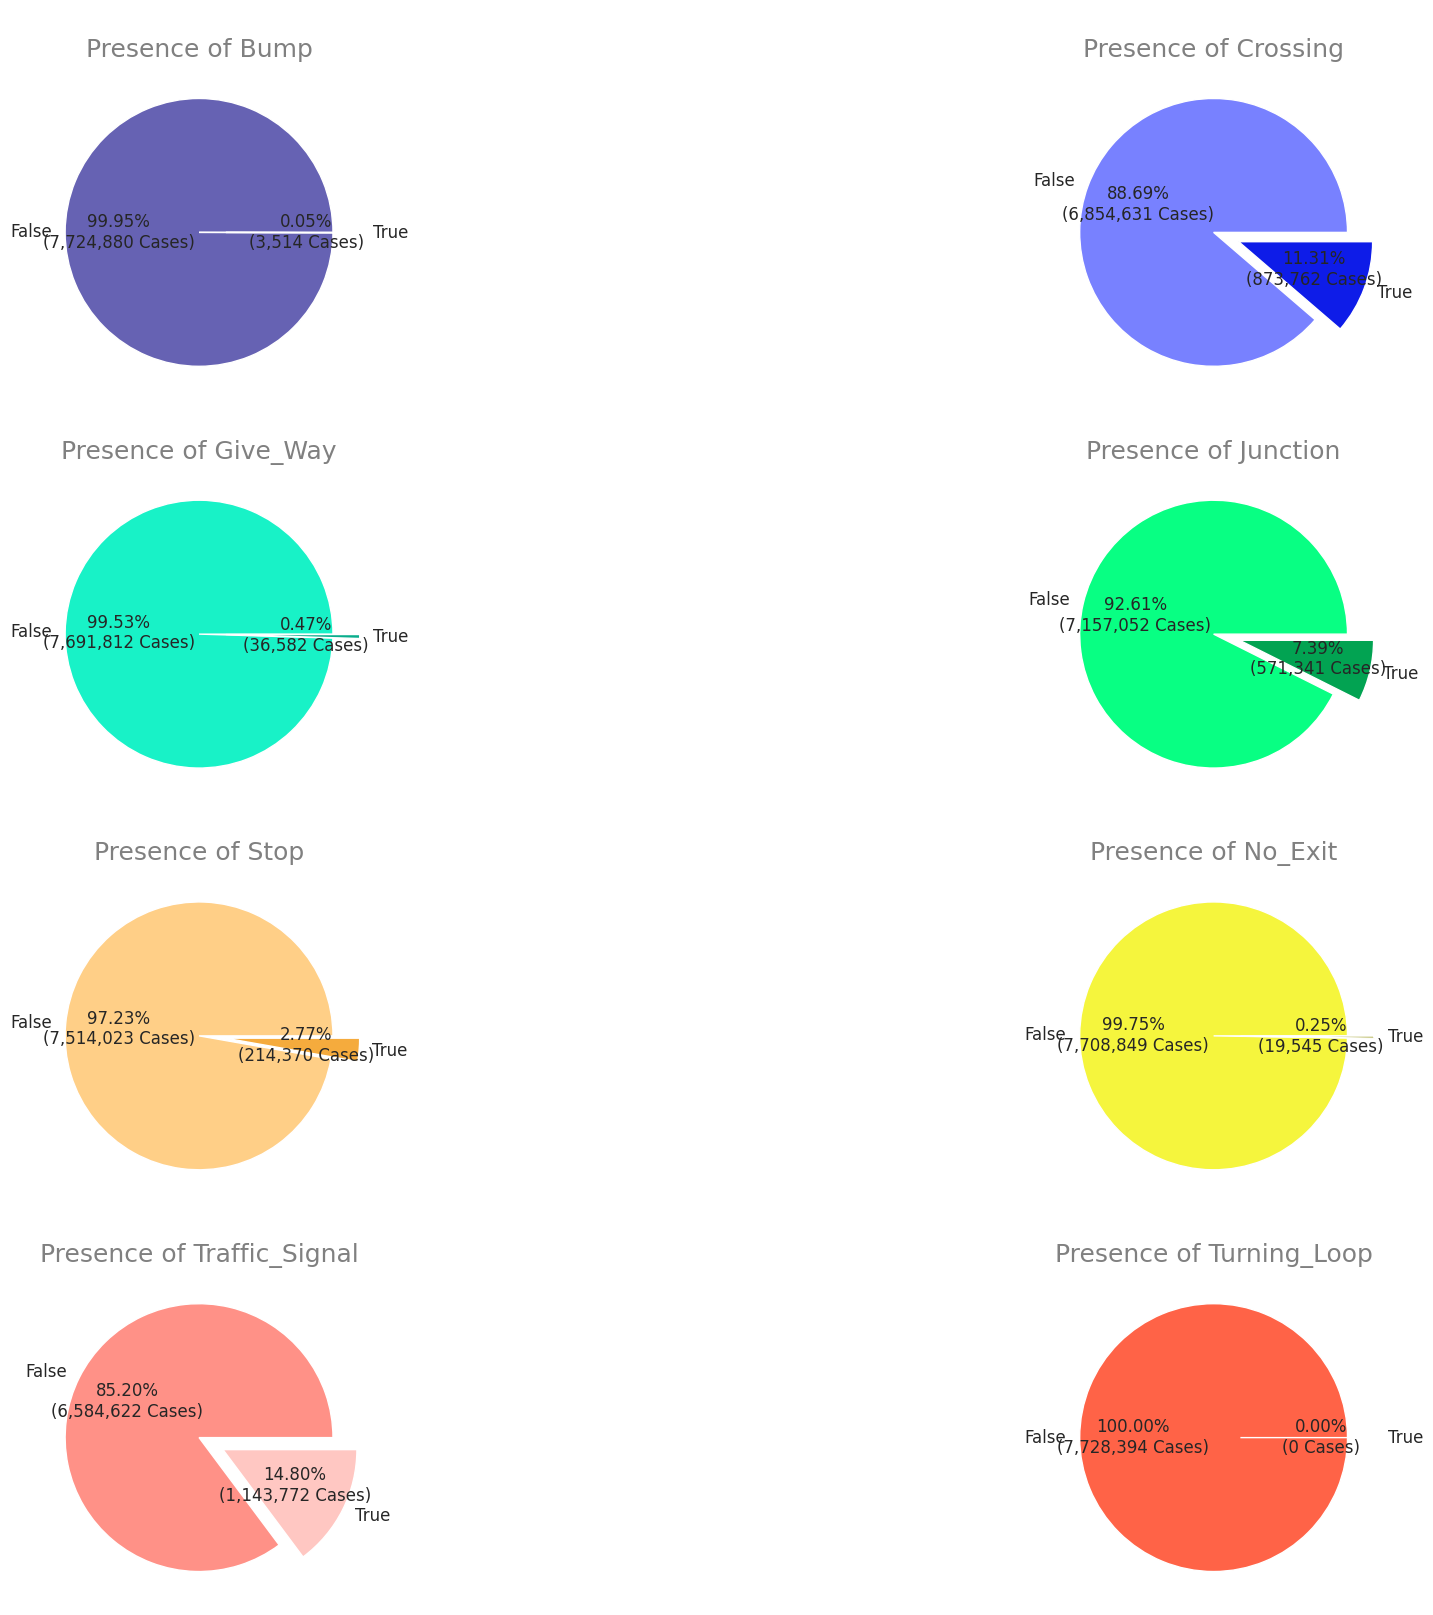

In [60]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (24,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:

    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']



    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')

    count += 1

Data Processing

In [61]:
df.dropna(inplace = True)
df.drop(['ID','Weather_Timestamp','Weather_Condition','End_Time','End_Time1','Start_Time1','Start_Time','County','Description','End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)','Start_Lat','Start_Lng','Airport_Code','Street','Country','State','Zipcode','Country'],axis=1, inplace = True)


In [62]:
df.drop(['City','Timezone'],axis=1, inplace = True)
df.head()

,Source,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Month,Hour,Minute,Day of Week,Year,Accident_duration,Comfort_Index,cluster_LatLng,cluster_Zipcode,cluster_Airport_Code,cluster_Street,cluster_City,Weather_Bin
3402762,Source1,3,1.160,42.1,58.0,29.76,10.0,SW,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,8.0,2.0,0.0,37.0,1.0,2016.0,265.625,5.858,0.0,0.0,1.0,2.0,2.0,Rainy
3402767,Source1,3,0.500,37.0,93.0,29.69,10.0,WSW,10.4,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,8.0,2.0,7.0,53.0,1.0,2016.0,265.625,4.650,0.0,0.0,2.0,0.0,2.0,Rainy
3402771,Source1,2,0.521,33.1,92.0,29.63,10.0,SW,3.5,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,8.0,2.0,11.0,51.0,1.0,2016.0,265.625,1.012,0.0,0.0,0.0,0.0,2.0,Snowy
3402773,Source1,2,0.826,32.0,100.0,29.59,10.0,West,3.5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,8.0,2.0,15.0,16.0,1.0,2016.0,265.625,0.000,0.0,0.0,0.0,2.0,0.0,Snowy
3402774,Source1,2,0.307,33.8,100.0,29.66,10.0,NNW,4.6,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,8.0,2.0,15.0,43.0,1.0,2016.0,265.625,1.800,0.0,0.0,2.0,0.0,2.0,Snowy


In [63]:
import pandas as pd

value_to_replace = 'your_value'

df = df.replace('<', pd.NA)

print(df)

          Source Severity  Distance(mi)  Temperature(F)  Humidity(%)  \
3402762  Source1        3         1.160            42.1         58.0   
3402767  Source1        3         0.500            37.0         93.0   
3402771  Source1        2         0.521            33.1         92.0   
3402773  Source1        2         0.826            32.0        100.0   
3402774  Source1        2         0.307            33.8        100.0   
...          ...      ...           ...             ...          ...   
7728389  Source1        2         0.543            86.0         40.0   
7728390  Source1        2         0.338            70.0         73.0   
7728391  Source1        2         0.561            73.0         64.0   
7728392  Source1        2         0.772            71.0         81.0   
7728393  Source1        2         0.537            79.0         47.0   

         Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
3402762         29.76            10.0             SW          

In [64]:
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [65]:
sampled_df1 = df.sample(n=100000, random_state=42)

Machine Learning

In [66]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [67]:
import pandas as pd

categorical_columns = sampled_df1.select_dtypes(include=['object']).columns

label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    sampled_df1[column] = label_encoder.fit_transform(sampled_df1[column])





In [68]:
for column in sampled_df1.columns:
    # If the column is of boolean data type
    if sampled_df1[column].dtype == 'bool':
        # Convert the column to integer type
        sampled_df1[column] = sampled_df1[column].astype(int)

sampled_df1.head()

,Source,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Month,Hour,Minute,Day of Week,Year,Accident_duration,Comfort_Index,cluster_LatLng,cluster_Zipcode,cluster_Airport_Code,cluster_Street,cluster_City,Weather_Bin
6328362,0,1,0.031,59.0,78.0,30.06,10.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5.0,1.0,20.0,24.0,2.0,2021.0,120.616667,21.06,2.0,0.0,0.0,1.0,1.0,0
5160532,0,1,0.385,51.0,61.0,30.10,10.0,5,9.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,10.0,11.0,59.0,1.0,2022.0,95.883333,11.59,0.0,1.0,1.0,2.0,0.0,0
7117708,0,1,0.000,61.0,62.0,29.56,10.0,6,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,4.0,17.0,4.0,4.0,2020.0,32.833333,17.98,4.0,2.0,2.0,1.0,2.0,0
7037480,0,1,0.000,63.0,72.0,29.68,10.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,13.0,6.0,21.0,12.0,6.0,2020.0,34.966667,22.32,4.0,2.0,1.0,0.0,1.0,0
7302800,0,1,0.629,40.0,68.0,29.37,10.0,9,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,23.0,10.0,22.0,49.0,3.0,2019.0,92.750000,5.44,0.0,0.0,1.0,0.0,0.0,1


Heatmap

<Axes: >

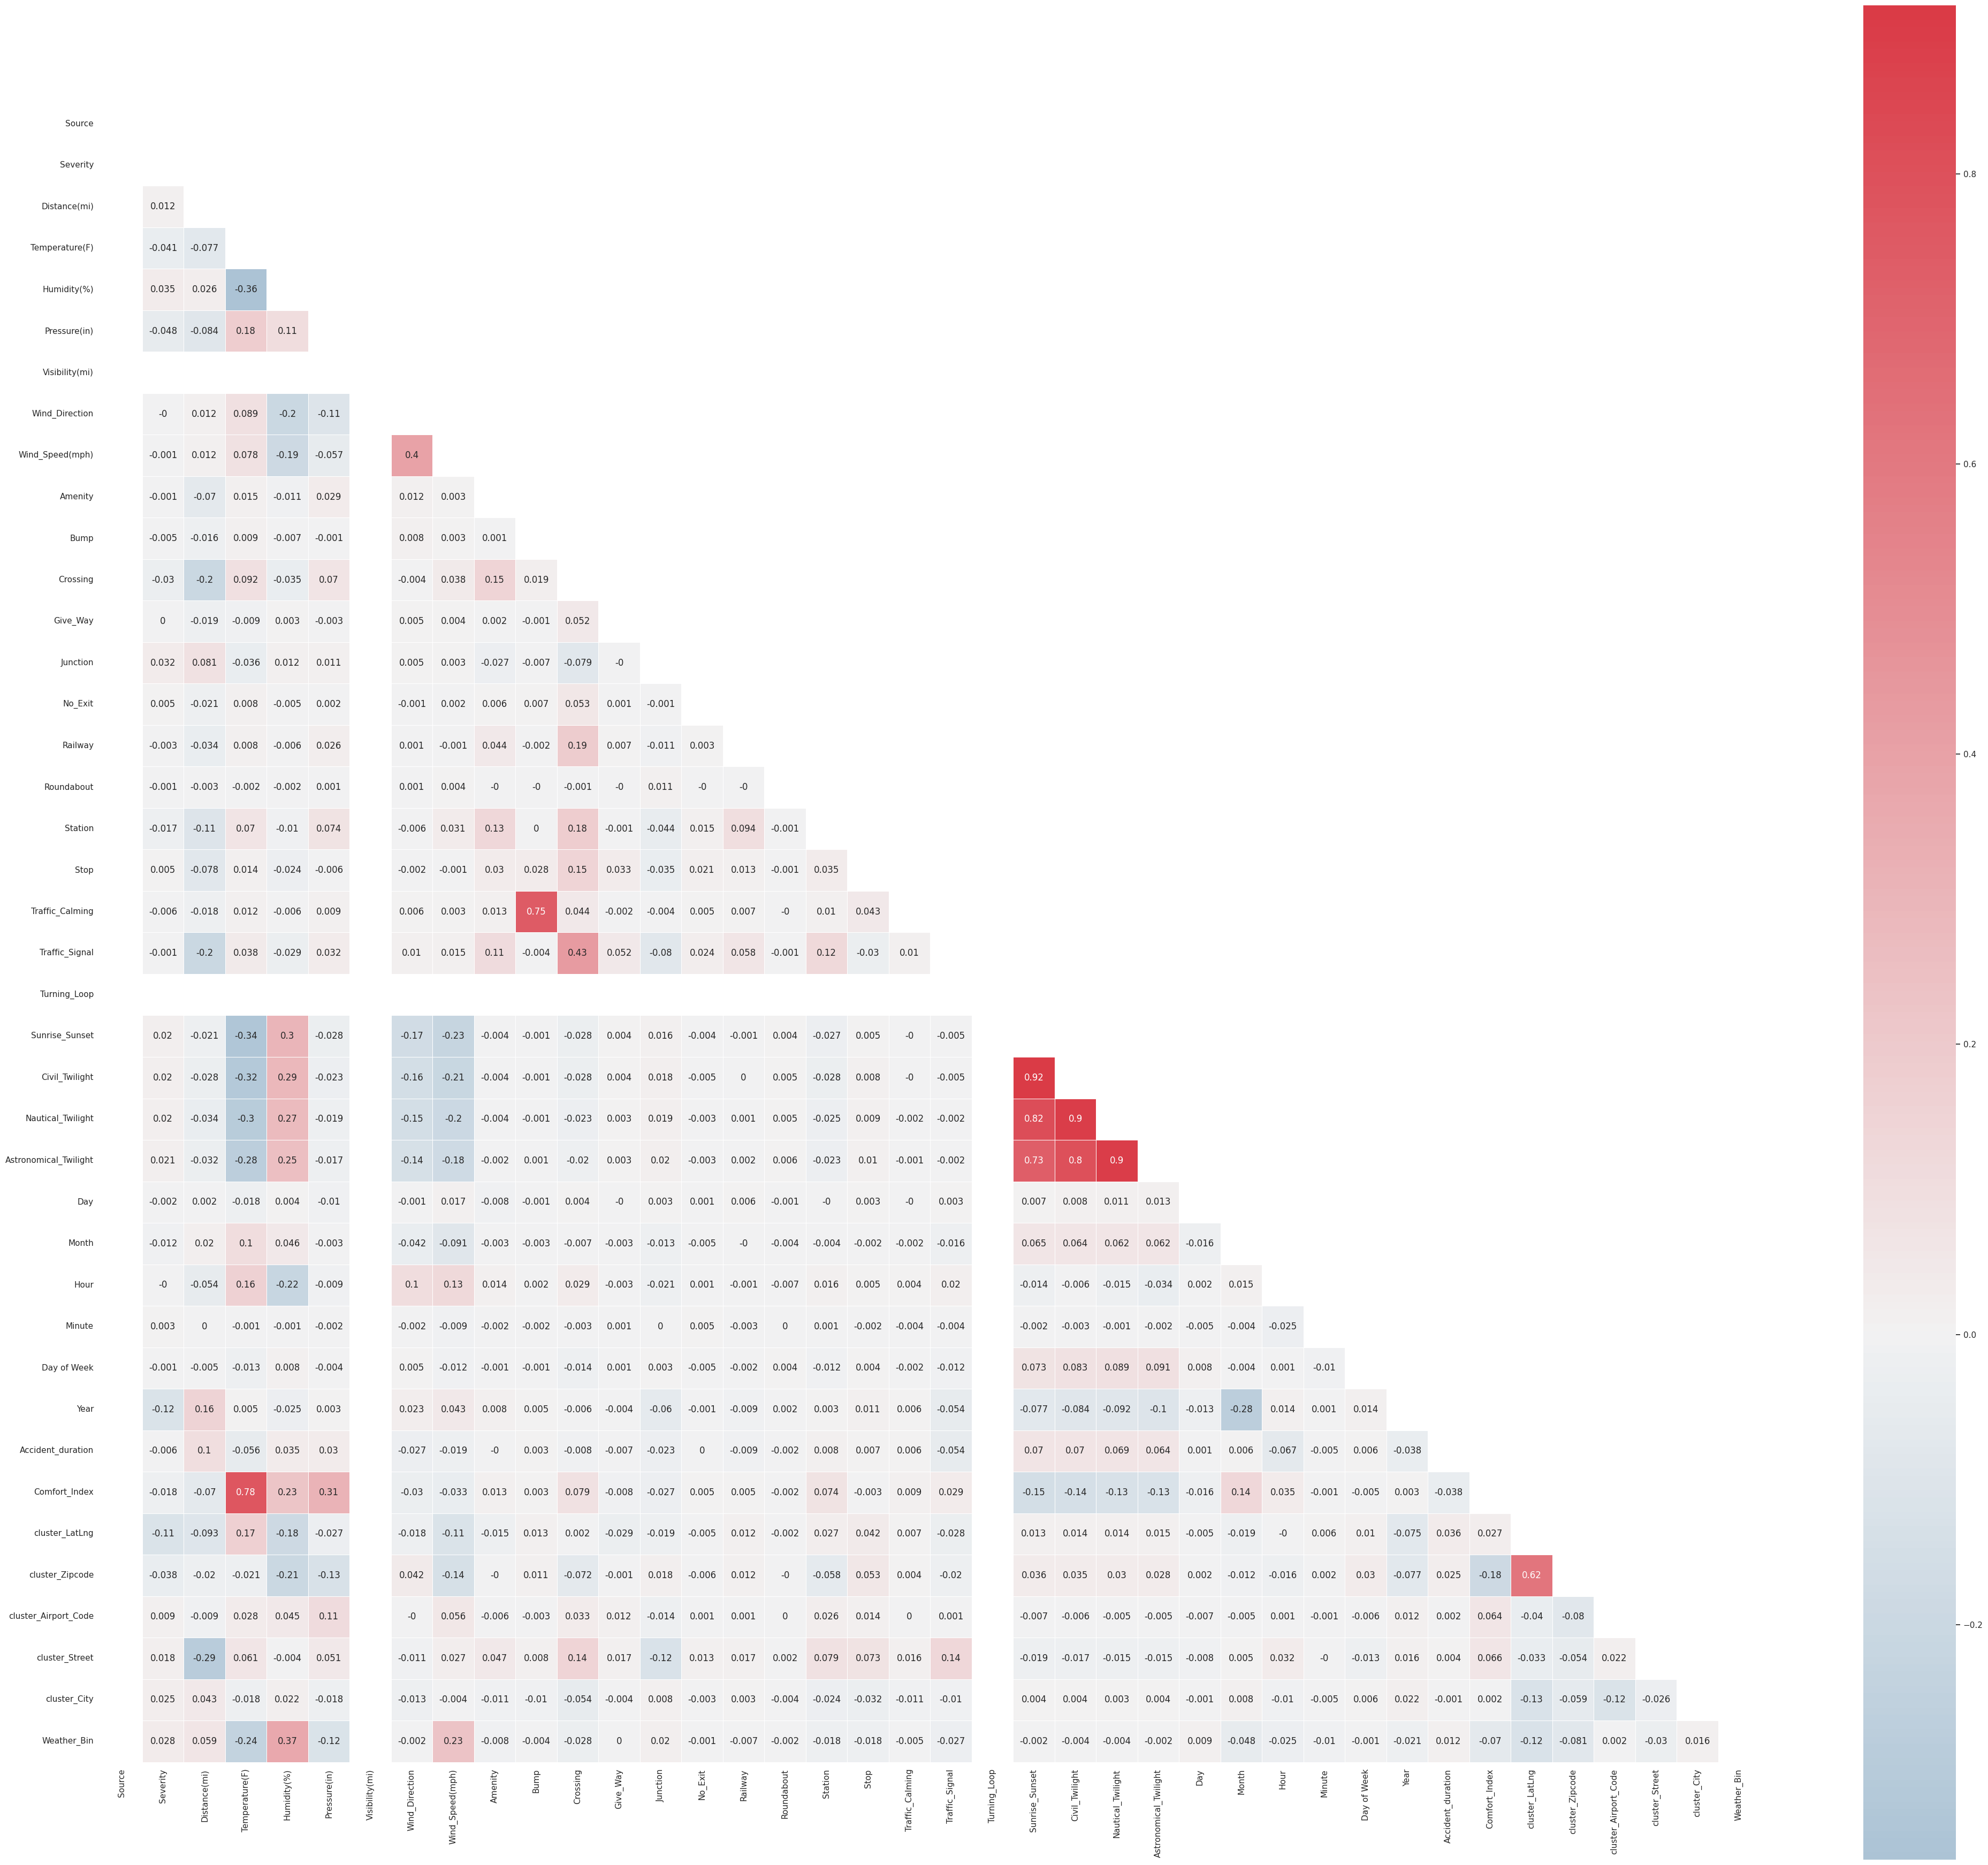

In [69]:
corr = sampled_df1.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [70]:

target=sampled_df1["Severity"].astype(int)

x=sampled_df1.drop(columns=["Severity"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.25, random_state=2)


KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('[K-Nearest Neighbors (KNN)] Accuracy score: {:.3f}.'.format(accuracy))

print('[K-Nearest Neighbors (KNN)] Score: {:.3f}.'.format(knn.score(X_test, y_test)))

[K-Nearest Neighbors (KNN)] Accuracy score: 0.944.
[K-Nearest Neighbors (KNN)] Score: 0.944.


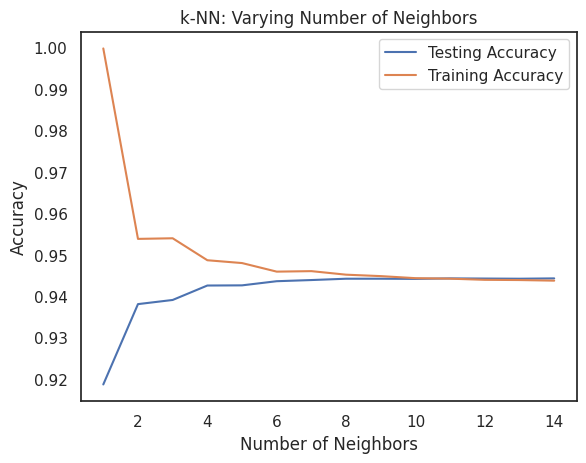

In [75]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, n_neighbor in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [76]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.15      0.25       191
           1       0.94      1.00      0.97     23578
           2       0.76      0.03      0.05       458
           3       0.00      0.00      0.00       773

    accuracy                           0.94     25000
   macro avg       0.60      0.29      0.32     25000
weighted avg       0.91      0.94      0.92     25000



In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))


[Decision Tree -- entropy] accuracy_score: 0.947.
[Decision Tree -- gini] accuracy_score: 0.948.


In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Instantiate the GridSearchCV object: dt_cv
dt_cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score is {}".format(dt_cv.best_score_))

# Predict the labels of the test set: y_pred
y_pred = dt_cv.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score is 0.9446933333333334
Accuracy: 0.947


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score (accuracy) on training data is 0.9446933333333334
Test set accuracy: 0.947
Training set accuracy: 0.952
Confusion Matrix:
 [[   63   112    14     2]
 [   22 23406    81    69]
 [   11   290   126    31]
 [    0   668    21    84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.33      0.44       191
           1       0.96      0.99      0.97     23578
           2       0.52      0.28      0.36       458
           3       0.45      0.11      0.18       773

    accuracy                           0.95     25000
   macro avg       0.65      0.43      0.49     25000
weighted avg       0.93      0.95      0.93     25000



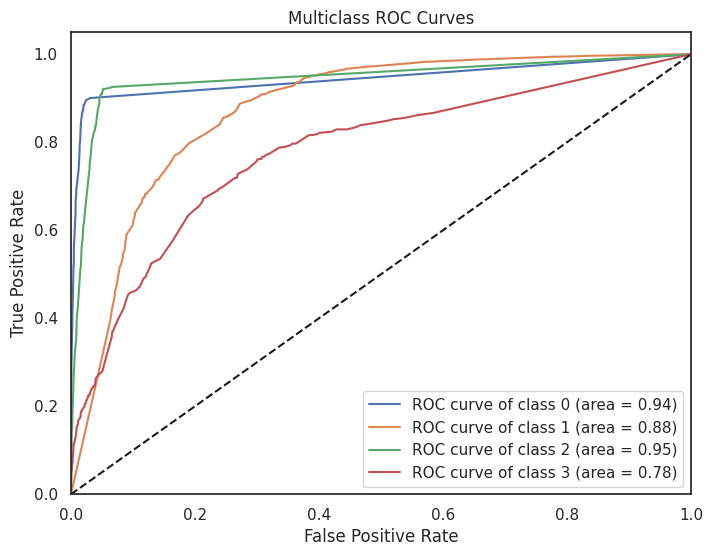

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


# Parameter grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Instantiate the GridSearchCV object
dt_cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the tuned parameters and best score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score (accuracy) on training data is {}".format(dt_cv.best_score_))

# Predict the labels of the test set
y_pred = dt_cv.predict(X_test)

# Compute and print the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.3f}'.format(accuracy_test))

# Compute and print the accuracy on the training set
y_pred_train = dt_cv.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Training set accuracy: {:.3f}'.format(accuracy_train))

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_prob = dt_cv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()


Logistic Regression

Training Accuracy: 0.9407466666666666
Test Accuracy: 0.94168


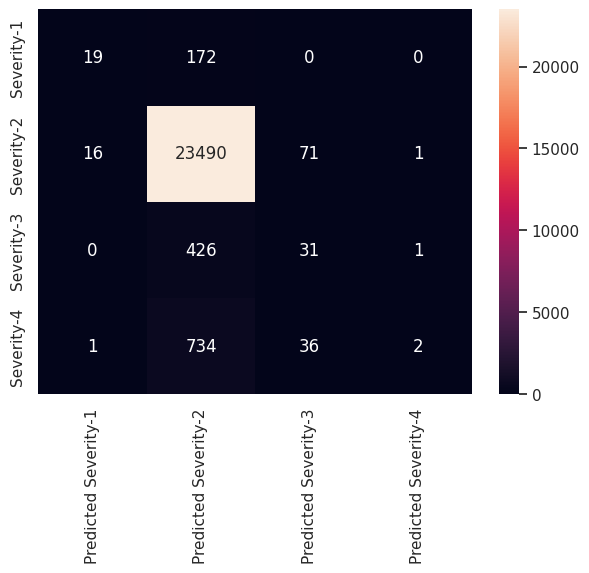



Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.10      0.17       191
           1       0.95      1.00      0.97     23578
           2       0.22      0.07      0.10       458
           3       0.50      0.00      0.01       773

    accuracy                           0.94     25000
   macro avg       0.55      0.29      0.31     25000
weighted avg       0.92      0.94      0.92     25000



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=1)

logistic_reg.fit(X_train, y_train)
# Predict on the training set
y_train_predict = logistic_reg.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy}')

# Predict on the test set
y_test_predict = logistic_reg.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy}')

# Confusion matrix and heatmap for the test set
cm = confusion_matrix(y_test, y_test_predict)


df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

print("")
print("")

# Classification report for the test set
classification_rep = classification_report(y_test, y_test_predict)
print('Classification Report:\n', classification_rep)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a LogisticRegression instance with class_weight set to 'balanced' since the data is not balanced
logistic_reg = LogisticRegression(random_state=1, class_weight='balanced')

logistic_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# Calculate and print accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.61272
Test Accuracy: 0.62144

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.10      0.76      0.18       191
           1       0.98      0.62      0.76     23578
           2       0.20      0.70      0.31       458
           3       0.05      0.49      0.10       773

    accuracy                           0.62     25000
   macro avg       0.34      0.64      0.34     25000
weighted avg       0.93      0.62      0.73     25000



In [83]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

feature_names = sampled_df1.drop('Severity', axis=1).columns


# Fit a random forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)



                  Feature  Importance
31      Accident_duration    0.115404
30                   Year    0.076659
1            Distance(mi)    0.067664
32          Comfort_Index    0.067019
4            Pressure(in)    0.064903
2          Temperature(F)    0.057401
3             Humidity(%)    0.056750
28                 Minute    0.055004
25                    Day    0.049799
26                  Month    0.048156
27                   Hour    0.045742
6          Wind_Direction    0.041671
7         Wind_Speed(mph)    0.037871
29            Day of Week    0.033733
33         cluster_LatLng    0.029682
35   cluster_Airport_Code    0.020104
37           cluster_City    0.019712
38            Weather_Bin    0.019423
36         cluster_Street    0.019046
34        cluster_Zipcode    0.017838
19         Traffic_Signal    0.009104
10               Crossing    0.008354
12               Junction    0.007429
21         Sunrise_Sunset    0.005708
24  Astronomical_Twilight    0.005263
22         C

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


selected_features = ['Accident_duration', 'Year', 'Distance(mi)', 'Day','Comfort_Index','Pressure(in)','Temperature(F)','Humidity(%)','Minute','Day','Month','Hour','Wind_Direction','Wind_Speed(mph)','Day of Week','cluster_LatLng']




# Create a logistic regression model instance with class_weight set to 'balanced'
logistic_reg = LogisticRegression(random_state=1, class_weight='balanced')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Different algorithms
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Predictions and evaluations
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Classification reports
print("\nClassification Report (Training Set):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Best Hyperparameters: {'C': 0.01, 'solver': 'liblinear'}
Training Accuracy: 0.9129866666666666
Test Accuracy: 0.91296

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.16      0.61      0.26       485
           1       0.97      0.95      0.96     70680
           2       0.27      0.67      0.39      1431
           3       0.15      0.02      0.04      2404

    accuracy                           0.91     75000
   macro avg       0.39      0.56      0.41     75000
weighted avg       0.92      0.91      0.91     75000


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.17      0.56      0.27       191
           1       0.97      0.95      0.96     23578
           2       0.26      0.67      0.38       458
           3       0.13      0.02      0.04       773

    accuracy                           0.91     25000
   macro avg       0.38      0.55      0.41  

Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [86]:
import warnings
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [87]:
y_train_predict = rfcl.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.99936


In [88]:
y_test_predict = rfcl.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.95008


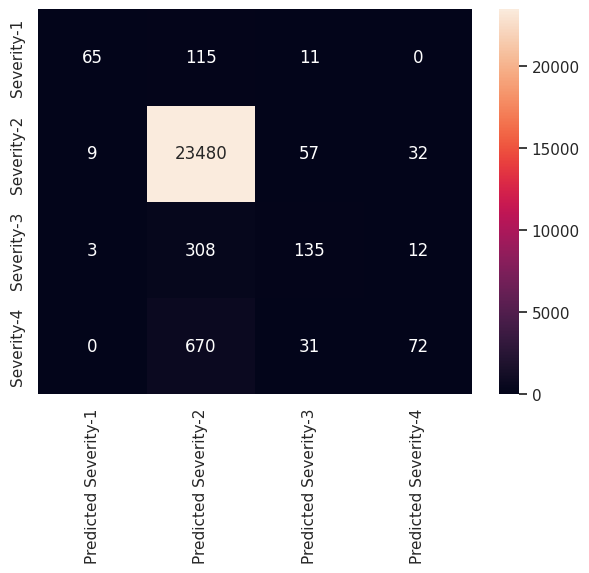

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.34      0.49       191
           1       0.96      1.00      0.98     23578
           2       0.58      0.29      0.39       458
           3       0.62      0.09      0.16       773

    accuracy                           0.95     25000
   macro avg       0.75      0.43      0.50     25000
weighted avg       0.94      0.95      0.94     25000



In [89]:
# Confusion matrix and heatmap for the test set
cm = metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1, 2, 3])

df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

classification_rep = classification_report(y_test, y_test_predict)
print('Classification Report:\n', classification_rep)

Finding the best model through hyperparameter tuning

In [90]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [91]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],

}

# Create a GridSearchCV instance
grid_search = GridSearchCV(rfcl, param_grid, cv=3)

grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 150}


In [92]:
best_model = grid_search.best_estimator_

In [93]:
# Make predictions on the training set
y_train_predict = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)

print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.99612


In [94]:
# Make predictions on the test set
y_test_predict = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.95068


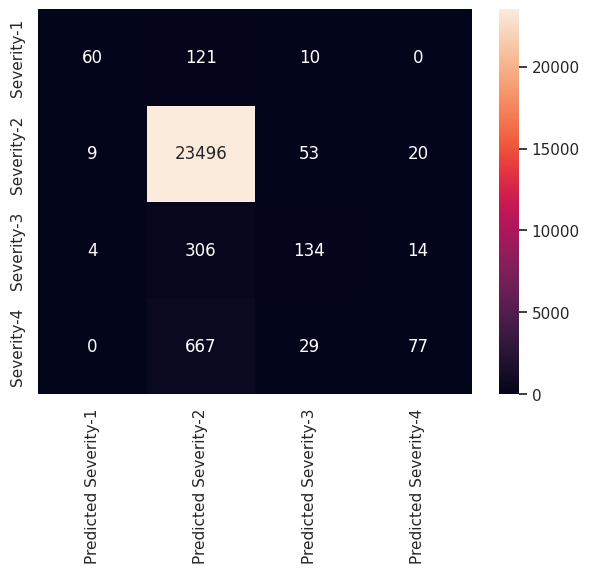

In [95]:
# Confusion matrix and heatmap for the test set
cm = confusion_matrix(y_test, y_test_predict)


df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])

plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()


In [96]:
# Classification report for detailed analysis
classification_rep = classification_report(y_test, y_test_predict)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.31      0.45       191
           1       0.96      1.00      0.98     23578
           2       0.59      0.29      0.39       458
           3       0.69      0.10      0.17       773

    accuracy                           0.95     25000
   macro avg       0.77      0.43      0.50     25000
weighted avg       0.94      0.95      0.94     25000



In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming rfcl is an instance of RandomForestClassifier
rfcl = RandomForestClassifier(random_state=0)  # Ensure reproducibility

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

# Create a GridSearchCV instance
# Using 'accuracy' as the scoring metric, you can choose a different one if needed
grid_search = GridSearchCV(rfcl, param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Hyperparameters: {best_params}')

# Make predictions on the training set using the best model
y_train_predict = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy}')

# Make predictions on the test set using the best model
y_test_predict = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
print(f'Test Accuracy: {test_accuracy}')


Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Training Accuracy: 0.99972
Test Accuracy: 0.948


Using ensemble methods

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.30      0.45       145
           1       0.95      1.00      0.97     18853
           2       0.65      0.14      0.23       355
           3       0.70      0.04      0.08       647

    accuracy                           0.95     20000
   macro avg       0.80      0.37      0.43     20000
weighted avg       0.94      0.95      0.93     20000

Confusion Matrix:
[[   43   100     2     0]
 [    5 18823    18     7]
 [    0   300    50     5]
 [    0   612     7    28]]

Accuracy Score: 0.9472



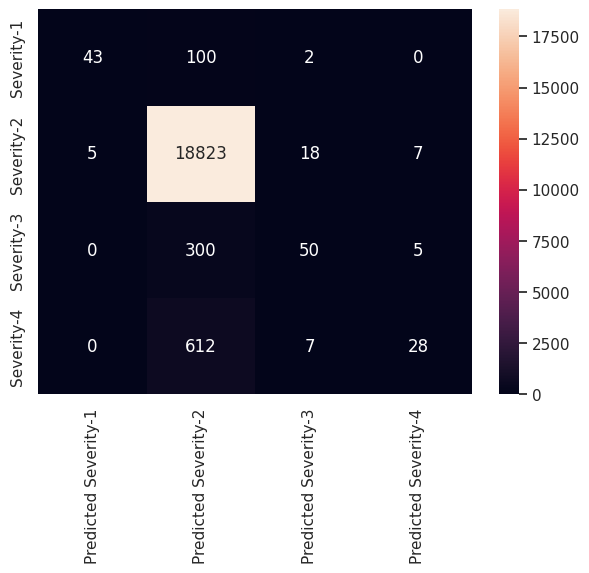

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

# Create individual classifiers
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
gb_clf = GradientBoostingClassifier(random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gb', gb_clf)], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)
# Evaluate the ensemble model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])
print("")
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()


*Check* if the data is not balanced

In [99]:
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample


#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
#Evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [100]:
sampled_df1.head().style.background_gradient(cmap='Dark2_r')

,Source,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Month,Hour,Minute,Day of Week,Year,Accident_duration,Comfort_Index,cluster_LatLng,cluster_Zipcode,cluster_Airport_Code,cluster_Street,cluster_City,Weather_Bin
6328362,0,1,0.031000,59.000000,78.000000,30.060000,10.000000,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5.000000,1.000000,20.000000,24.000000,2.000000,2021.000000,120.616667,21.060000,2.000000,0.000000,0.000000,1.000000,1.000000,0
5160532,0,1,0.385000,51.000000,61.000000,30.100000,10.000000,5,9.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.000000,10.000000,11.000000,59.000000,1.000000,2022.000000,95.883333,11.590000,0.000000,1.000000,1.000000,2.000000,0.000000,0
7117708,0,1,0.000000,61.000000,62.000000,29.560000,10.000000,6,10.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.000000,4.000000,17.000000,4.000000,4.000000,2020.000000,32.833333,17.980000,4.000000,2.000000,2.000000,1.000000,2.000000,0
7037480,0,1,0.000000,63.000000,72.000000,29.680000,10.000000,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,13.000000,6.000000,21.000000,12.000000,6.000000,2020.000000,34.966667,22.320000,4.000000,2.000000,1.000000,0.000000,1.000000,0
7302800,0,1,0.629000,40.000000,68.000000,29.370000,10.000000,9,13.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,23.000000,10.000000,22.000000,49.000000,3.000000,2019.000000,92.750000,5.440000,0.000000,0.000000,1.000000,0.000000,0.000000,1


In [101]:
sampled_df1['Severity'].value_counts()


1    94258
3     3177
2     1889
0      676
Name: Severity, dtype: int64

Using the SMOTHE for imbalanced classification

In [102]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
counter=Counter(target)
counter

Counter({1: 94258, 3: 3177, 2: 1889, 0: 676})

In [103]:
over = SMOTE()
under = RandomUnderSampler()

# Create a pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to your data
X, y = pipeline.fit_resample(x, target)

In [104]:
counter=Counter(y)
counter

Counter({0: 94258, 1: 94258, 2: 94258, 3: 94258})

Implementing the models Again

In [105]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=2)


Accuracy: 0.44764370133039105

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     23281
           1       0.87      0.09      0.17     23690
           2       0.32      0.79      0.46     23704
           3       0.38      0.19      0.26     23583

    accuracy                           0.45     94258
   macro avg       0.59      0.45      0.41     94258
weighted avg       0.59      0.45      0.41     94258


Confusion Matrix:
 [[16714   130  6069   368]
 [  515  2174 15142  5859]
 [ 3819    42 18767  1076]
 [  307   156 18581  4539]]




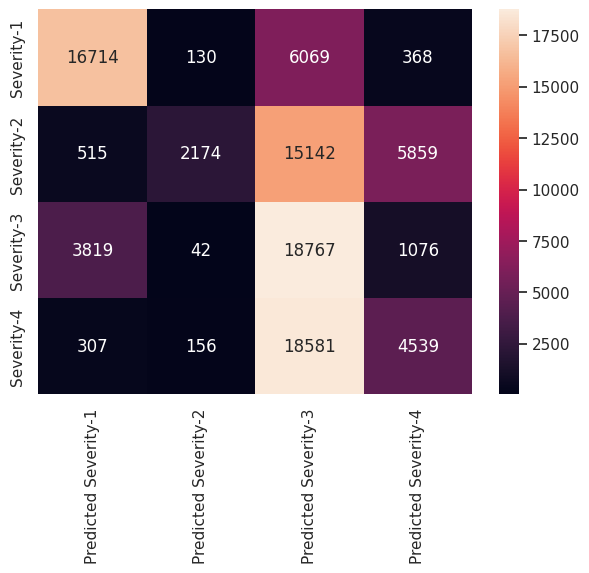

In [107]:
diab_model = GaussianNB(var_smoothing=1e-9)

# Fit the model to the training data
diab_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = diab_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("")
cm = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])
print("")
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [109]:
# Assuming rfcl is your RandomForestClassifier instance
y_train_predict = rfcl.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.9999045173884444


In [110]:
y_test_predict = rfcl.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_predict)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.9855715164760551


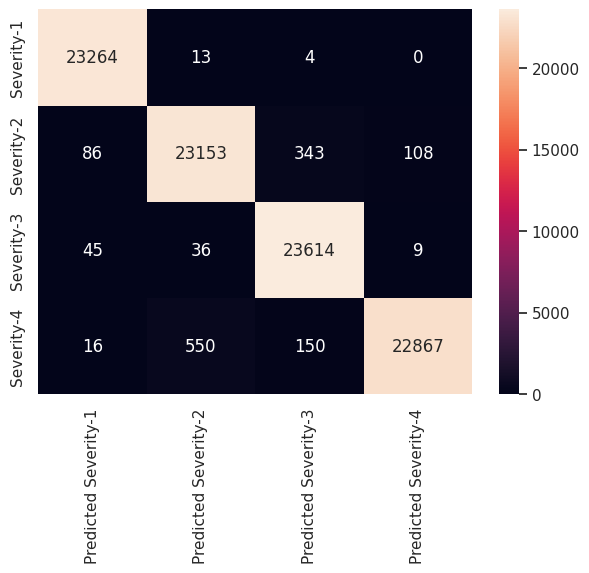

In [111]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels=[0, 1, 2, 3])


df_cm = pd.DataFrame(cm, index=[i for i in ['Severity-1', 'Severity-2', 'Severity-3', 'Severity-4']],
                     columns=[i for i in ['Predicted Severity-1', 'Predicted Severity-2', 'Predicted Severity-3', 'Predicted Severity-4']])
print("")
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

Decison  tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


# Parameter grid
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1)

# Instantiate the GridSearchCV object
dt_cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the tuned parameters and best score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))
print("Best score (accuracy) on training data is {}".format(dt_cv.best_score_))

# Predict the labels of the test set
y_pred = dt_cv.predict(X_test)

# Compute and print the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.3f}'.format(accuracy_test))

# Compute and print the accuracy on the training set
y_pred_train = dt_cv.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Training set accuracy: {:.3f}'.format(accuracy_train))

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_prob = dt_cv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()
